In [194]:
from collections import defaultdict

from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
import pymc3

%matplotlib inline
plt.style.use('seaborn-whitegrid')

# Easy

In [195]:
# Calculate posterior distribution
p_grid = np.linspace(0, 1, 1000)
prior = np.array([1]*1000)
likelihood = binom.pmf(k=6, n=9, p=p_grid)
posterior = likelihood * prior
posterior = posterior / sum(posterior)

In [196]:
# Draw samples
np.random.seed(100)
samples = np.random.choice(p_grid, size=10000, p=posterior)

### 3E1

In [197]:
sum(samples < 0.2) / samples.shape[0]

0.001

### 3E2

In [198]:
sum(samples > 0.8) / samples.shape[0]

0.1209

### 3E3

In [199]:
sum((samples > 0.2) & (samples < 0.8)) / samples.shape[0]

0.8781

### 3E4

In [200]:
np.percentile(samples, 20)

0.5155155155155156

### 3E5

In [201]:
np.percentile(samples, 80)

0.7597597597597597

### 3E6

In [202]:
pymc3.stats.hpd(samples, alpha=0.34)

array([0.51651652, 0.78878879])

### 3E7

In [203]:
np.percentile(samples, 17), np.percentile(samples, 83)

(0.4984984984984985, 0.772942942942943)

# Medium

### 3M1

Text(0,0.5,'probability')

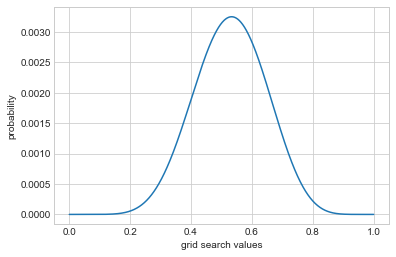

In [204]:
# Calculate posterior distribution
p_grid = np.linspace(0, 1, 1000)
prior = np.array([1]*1000)
likelihood = binom.pmf(k=8, n=15, p=p_grid)
posterior = likelihood * prior
posterior = posterior / sum(posterior)
plt.plot(p_grid, posterior)
plt.xlabel('grid search values')
plt.ylabel('probability')

### 3M2

In [205]:
# Draw samples
np.random.seed(100)
samples = np.random.choice(p_grid, size=10000, p=posterior)
pymc3.stats.hpd(samples, alpha=0.1)

array([0.33733734, 0.72572573])

### 3M3

Text(0.5,1,'Posterior')

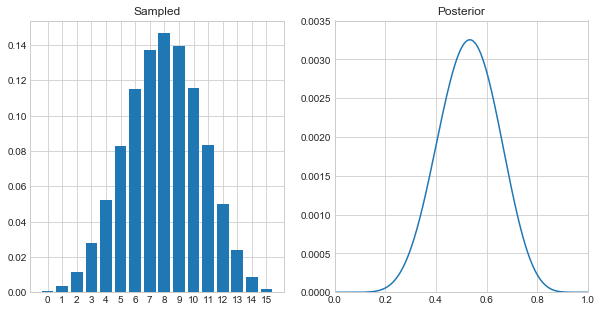

In [207]:
counts = list()
weighted_avg_counts = defaultdict(int)
size = 1000

for p, p_post in zip(p_grid, posterior):
    values, freq = np.unique(np.random.binomial(n=15, p=p, size=size), return_counts=True)

    # Weigh frequency by probability of posterior
    freq = p_post * (freq / size)
    
    # Add to dictionary
    for v,f in zip(values, freq):
        weighted_avg_counts[v] += f

values, weighted_count = zip(*list(weighted_avg_counts.items()))
# weighted_count = weighted_count / sum(weighted_count)

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))

ax1.bar(values, weighted_count)
ax1.set_xticks(np.arange(0, 16, 1))
ax1.set_title('Sampled')

ax2.plot(p_grid, posterior)
ax2.set_xlim(0,1)
ax2.set_ylim(0,0.0035)
ax2.set_title('Posterior')

### 3M4

In [178]:
counts = list()
weighted_avg_counts = defaultdict(int)
size=1000

for p, p_post in zip(p_grid, posterior):
    values, freq = np.unique(np.random.binomial(n=9, p=p, size=size), return_counts=True)

    # Weigh frequency by probability of posterior
    freq = p_post * (freq/size)
    
    # Add to dictionary
    for v,f in zip(values, freq):
        weighted_avg_counts[v] += f

weighted_avg_counts[6]

0.17703714185718447

### 3M5

Text(0,0.5,'probability')

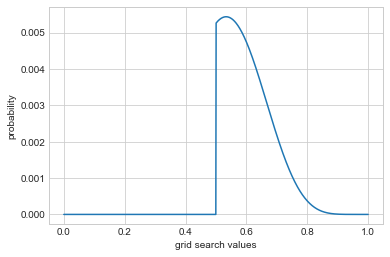

In [209]:
# Calculate posterior distribution
p_grid = np.linspace(0, 1, 1000)
prior = (p_grid >= 0.5).astype(float)
likelihood = binom.pmf(k=8, n=15, p=p_grid)
posterior = likelihood * prior
posterior = posterior / sum(posterior)
plt.plot(p_grid, posterior)
plt.xlabel('grid search values')
plt.ylabel('probability')

##### 2

In [210]:
np.random.seed(100)
samples = np.random.choice(p_grid, size=10000, p=posterior)
pymc3.stats.hpd(samples, alpha=0.1)

array([0.5005005 , 0.71271271])

##### 3

Text(0.5,1,'Posterior')

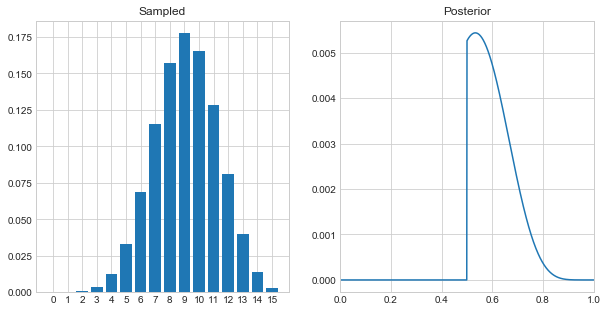

In [221]:
counts = list()
weighted_avg_counts = defaultdict(int)
size = 10000

for p, p_post in zip(p_grid, posterior):
    values, freq = np.unique(np.random.binomial(n=15, p=p, size=size), return_counts=True)

    # Weigh frequency by probability of posterior
    freq = p_post * (freq / size)
    
    # Add to dictionary
    for v,f in zip(values, freq):
        weighted_avg_counts[v] += f

values, weighted_count = zip(*list(weighted_avg_counts.items()))

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))

ax1.bar(values, weighted_count)
ax1.set_xticks(np.arange(0, 16, 1))
ax1.set_title('Sampled')

ax2.plot(p_grid, posterior)
ax2.set_xlim(0,1)
ax2.set_title('Posterior')

In [222]:
counts = list()
weighted_avg_counts = defaultdict(int)
size=1000

for p, p_post in zip(p_grid, posterior):
    values, freq = np.unique(np.random.binomial(n=9, p=p, size=size), return_counts=True)

    # Weigh frequency by probability of posterior
    freq = p_post * (freq/size)
    
    # Add to dictionary
    for v,f in zip(values, freq):
        weighted_avg_counts[v] += f

weighted_avg_counts[6]

0.2323578485372818

# Hard

In [299]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
                   0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,
                   0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,
                   1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])

birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
                   1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,
                   1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,
                   0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0])

### 3H1

0.5555555555555556

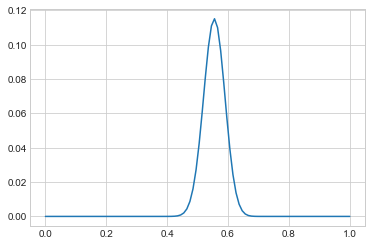

In [300]:
p_grid = np.linspace(0, 1, 100)
prior = np.repeat(1, 100) 
likelihood = binom.pmf(k=sum(birth1) + sum(birth2), n=200,  p=p_grid)
posterior = prior * likelihood
posterior /= sum(posterior)

plt.plot(p_grid, posterior)
p_grid[posterior.argmax()]

### 3H2

In [301]:
np.random.seed(100)
samples = np.random.choice(p_grid, size=size, p=posterior)

# Highest posterior density intervals
for alpha in [0.50, 0.11, 0.03]:
    print(f"{(1-alpha)*100}% highest posterior density interval:", pymc3.stats.hpd(samples, alpha=alpha))

50.0% highest posterior density interval: [0.54545455 0.58585859]
89.0% highest posterior density interval: [0.49494949 0.60606061]
97.0% highest posterior density interval: [0.48484848 0.62626263]


### 3H3

405.0727142570302

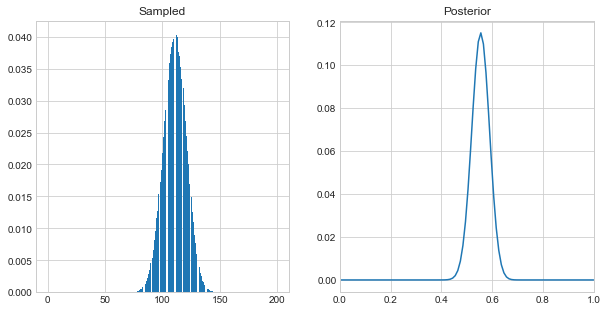

In [302]:
counts = list()
weighted_avg_counts = defaultdict(int)
size=10000

for p, p_post in zip(p_grid, posterior):
    values, freq = np.unique(np.random.binomial(n=200, p=p, size=size), return_counts=True)

    # Weigh frequency by probability of posterior
    freq = p_post * (freq/size)
    
    # Add to dictionary
    for v,f in zip(values, freq):
        weighted_avg_counts[v] += f

values, weighted_count = zip(*list(weighted_avg_counts.items()))
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))

ax1.bar(values, weighted_count)
# ax1.set_xticks(np.arange(190, 201, 1))
ax1.set_title('Sampled')

ax2.plot(p_grid, posterior)
ax2.set_xlim(0,1)
ax2.set_title('Posterior')

weighted_avg_counts[111]*size

### 3H4

497.3303978385003

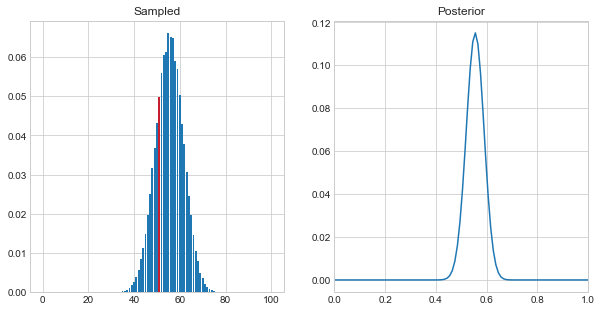

In [303]:
# Simulated first borns
counts = list()
weighted_avg_counts = defaultdict(int)
size=10000

for p, p_post in zip(p_grid, posterior):
    values, freq = np.unique(np.random.binomial(n=100, p=p, size=size), return_counts=True)

    # Weigh frequency by probability of posterior
    freq = p_post * (freq/size)
    
    # Add to dictionary
    for v,f in zip(values, freq):
        weighted_avg_counts[v] += f

values, weighted_count = zip(*list(weighted_avg_counts.items()))
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))

ax1.bar(values, weighted_count)
# ax1.set_xticks(np.arange(190, 201, 1))
ax1.set_title('Sampled')

ax2.plot(p_grid, posterior)
ax2.set_xlim(0,1)
ax2.set_title('Posterior')

ax1.vlines(sum(birth1), 0, weighted_avg_counts[sum(birth1)], colors='red')
weighted_avg_counts[sum(birth1)]*size

### 3H5

0.0007633331630841433

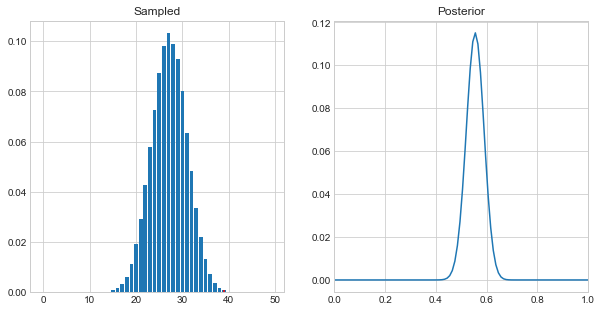

In [308]:
data = birth2[birth1 == 0]

# Calculate posterior
# p_grid = np.linspace(0, 1, 100)
# prior = np.repeat(1, 100) 
# likelihood = binom.pmf(k=sum(data), n=100,  p=p_grid)
# posterior = prior * likelihood
# posterior /= sum(posterior)

# Simulate
counts = list()
weighted_avg_counts = defaultdict(int)
size=10000

for p, p_post in zip(p_grid, posterior):
    values, freq = np.unique(np.random.binomial(n=data.shape[0], p=p, size=size), return_counts=True)

    # Weigh frequency by probability of posterior
    freq = p_post * (freq/size)
    
    # Add to dictionary
    for v,f in zip(values, freq):
        weighted_avg_counts[v] += f

values, weighted_count = zip(*list(weighted_avg_counts.items()))
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))

ax1.bar(values, weighted_count)
# ax1.set_xticks(np.arange(190, 201, 1))
ax1.set_title('Sampled')

ax2.plot(p_grid, posterior)
ax2.set_xlim(0,1)
ax2.set_title('Posterior')

ax1.vlines(sum(data), 0, weighted_avg_counts[sum(data)], colors='red')
weighted_avg_counts[sum(data)]